# Import necessary libraries:

In [81]:
from keras.saving.save import load_model
import numpy as np
import pandas as pd
from sklearn import metrics
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

# Load the model:

In [60]:
model = load_model("models/combined-u/encoder.h5", compile=False)

# Load the data:

In [82]:
data = pd.read_pickle("datasets/combined-u/x_test_split_alpha(0.005).pkl")

# Encode the data:

In [83]:
encoded_data = model.predict(data)

38/38 [==============================] - 0s 2ms/step


# Use Average Silhouette method to find the optimal number of clusters using KMeans:

In [84]:
# Define clustering loop
max_clusters = 30
silhouette = np.zeros(max_clusters)

for n_clusters in range(2, max_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(encoded_data)
    silhouette[n_clusters] = metrics.silhouette_score(
        encoded_data, cluster_labels, metric="euclidean"
    )

# Determine the optimal number of clusters
optimal_n_clusters = np.argmax(silhouette)
print("Optimal number of clusters:", optimal_n_clusters)

Optimal number of clusters: 12


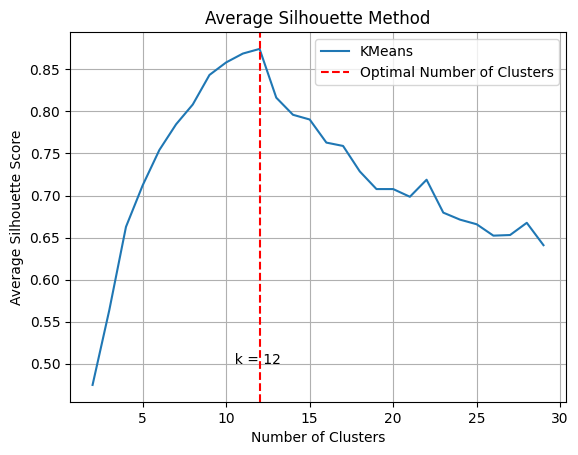

In [85]:
# Plot the silhouette scores
plt.plot(np.arange(2, max_clusters), silhouette[2:], label="KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Average Silhouette Method")

# annotate the optimal number of clusters with vertical dotted line and write the number of clusters
plt.axvline(x=optimal_n_clusters,
            linestyle="--" ,
            color="red",
            label='Optimal Number of Clusters')
plt.annotate('  k = %d' % optimal_n_clusters,
             xy=(optimal_n_clusters-2, 0.5),
             xytext=(optimal_n_clusters-2, 0.5)
)

plt.grid()
plt.legend()
plt.show()

# Use Elbow method to find the optimal number of clusters using KMeans:

In [86]:
# Define range of cluster numbers to try
max_clusters = 30

# Calculate WCSS for each cluster number using KMeans
wcss_kmeans = []
for n_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    kmeans.fit(encoded_data)
    wcss_kmeans.append(kmeans.inertia_)

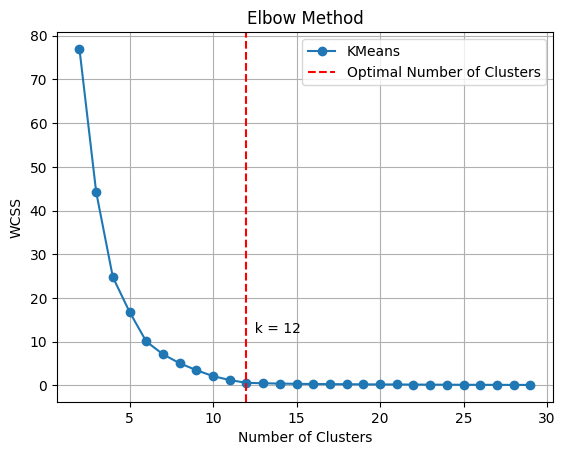

In [92]:
# Plot the WCSS for each cluster number
plt.plot(range(2, max_clusters), wcss_kmeans, marker='o', label="KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

# annotate the optimal number of clusters with vertical dotted line and write the number of clusters
plt.axvline(x=optimal_n_clusters,
            linestyle="--" ,
            color="red",
            label='Optimal Number of Clusters')
plt.annotate('  k = %d' % optimal_n_clusters,
             xy=(optimal_n_clusters, optimal_n_clusters),
             xytext=(optimal_n_clusters, optimal_n_clusters)
)

plt.grid()
plt.legend()
plt.show()

# Save the Kmeans model with the optimal number of clusters:

In [88]:
kmeans = KMeans(n_clusters=optimal_n_clusters, init="k-means++", random_state=42)

kmeans.fit(encoded_data)

joblib.dump(kmeans, "models/combined-u/kmeans.pkl")

['models/combined-u/kmeans.pkl']